# Proyecto 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Importación, unificación y limpiado de datos

In [5]:
# open a spss file and convert it to a pandas dataframe

df2010 = pd.read_spss("2010.sav")
df2011 = pd.read_spss("2011.sav")
df2012 = pd.read_spss("2012.sav")
df2013 = pd.read_spss("2013.sav")
df2014 = pd.read_spss("2014.sav")
df2015 = pd.read_spss("2015.sav")
df2016 = pd.read_spss("2016.sav")
df2017 = pd.read_spss("2017.sav")
df2018 = pd.read_spss("2018.sav")
df2019 = pd.read_spss("2019.sav")


# por si se desea ver los datos de con todas las columnas
# with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
#     display(df2019)

df2019.columns.to_list(), len(df2019.columns.to_list())

(['DEPREG',
  'MUPREG',
  'MESREG',
  'AÑOREG',
  'AÑOOCU',
  'CLAUNI',
  'NUNUHO',
  'NUNUMU',
  'EDADHOM',
  'EDADMUJ',
  'PUEHOM',
  'PUEMUJ',
  'NACHOM',
  'NACMUJ',
  'ESCHOM',
  'ESCMUJ',
  'CIUOHOM',
  'CIUOMUJ',
  'DEPOCU',
  'MUPOCU',
  'DIAOCU',
  'MESOCU'],
 22)

In [6]:
df2013.PUEHOM.unique()

['Mestizo / Ladino', 'Ignorado', 'Maya', 'Garífuna', 'Otro', 'Xinka']
Categories (6, object): ['Mestizo / Ladino', 'Ignorado', 'Maya', 'Garífuna', 'Otro', 'Xinka']

#### Arreglando la columna AÑOOCU

In [7]:
df2010.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)
df2011.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)


#### Arreglando la columna GETHOM

In [8]:
#Variables iguales en todos los años
#Depreg, mupreg, mesreg, añoreg, clauni(hay que ver que los espacios ten bien), Edadhom, Edadmuj, Nachom, Nacmuj, ESCHOM, ESCMUJ, CIUOHOM(ocuhom),CIUOMUJ(ocumuj), depocu, mupocu, Diaocu	


# FIX GETHOM AND PUEHOM
df2013[['GETHOM']] = 'No indigena'
df2013.loc[df2013['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2013.loc[df2013['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2014[['GETHOM']] = 'No indigena'
df2014.loc[df2014['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2014.loc[df2014['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2015[['GETHOM']] = 'No indigena'
df2015.loc[df2015['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2015.loc[df2015['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2016[['GETHOM']] = 'No indigena'
df2016.loc[df2016['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2016.loc[df2016['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2017[['GETHOM']] = 'No indigena'
df2017.loc[df2017['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2017.loc[df2017['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2018[['GETHOM']] = 'No indigena'
df2018.loc[df2018['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2018.loc[df2018['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2019[['GETHOM']] = 'No indigena'
df2019.loc[df2019['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2019.loc[df2019['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'

df2019[['GETHOM', 'PUEHOM']]


,GETHOM,PUEHOM
0,No indigena,Ladino / Mestizo
1,No indigena,Ladino / Mestizo
2,No indigena,Ladino / Mestizo
3,No indigena,Otro
4,No indigena,Ladino / Mestizo
...,...,...
76923,No indigena,Ladino / Mestizo
76924,Indigena,Maya
76925,No indigena,Ladino / Mestizo
76926,No indigena,Ladino / Mestizo


#### Arreglando la columna GETMUJ

In [9]:
# FIX GETMUJ AND PUEMUJ
df2013[['GETMUJ']] = 'No indigena'
df2013.loc[df2013['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2013.loc[df2013['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2014[['GETMUJ']] = 'No indigena'
df2014.loc[df2014['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2014.loc[df2014['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2015[['GETMUJ']] = 'No indigena'
df2015.loc[df2015['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2015.loc[df2015['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2016[['GETMUJ']] = 'No indigena'
df2016.loc[df2016['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2016.loc[df2016['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2017[['GETMUJ']] = 'No indigena'
df2017.loc[df2017['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2017.loc[df2017['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2018[['GETMUJ']] = 'No indigena'
df2018.loc[df2018['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2018.loc[df2018['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2019[['GETMUJ']] = 'No indigena'
df2019.loc[df2019['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2019.loc[df2019['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'

df2019[['GETMUJ', 'PUEMUJ']]

,GETMUJ,PUEMUJ
0,No indigena,Ladino / Mestizo
1,No indigena,Ladino / Mestizo
2,No indigena,Ladino / Mestizo
3,No indigena,Ladino / Mestizo
4,No indigena,Ladino / Mestizo
...,...,...
76923,No indigena,Otro
76924,Ignorado,Ignorado
76925,Ignorado,Ignorado
76926,No indigena,Ladino / Mestizo


#### Arreglando las columnas de 2010

In [10]:
df2010.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
df2010

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,Areag
0,Sacatepequez,Jocotenango,Febrero,2010.0,Comunidad de gananciales,28.0,26.0,No indigena,No indigena,Guatemala,...,Ignorado,Ignorado,Otros miembros de las fuerzas armadas,Otros miembros de las fuerzas armadas,Sacatepequez,Jocotenango,7.0,Febrero,2010.0,Urbano
1,Suchitepequez,Mazatenango,Diciembre,2010.0,Comunidad de gananciales,28.0,20.0,No indigena,No indigena,Guatemala,...,Primaria,Primaria,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18.0,Diciembre,2010.0,Urbano
2,Guatemala,Guatemala,Diciembre,2010.0,Comunidad de gananciales,25.0,22.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ignorado,Estudiante,Otros miembros de las fuerzas armadas,Guatemala,Guatemala,10.0,Marzo,2010.0,Urbano
3,Guatemala,Guatemala,Mayo,2010.0,Comunidad de gananciales,45.0,41.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ninguno,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27.0,Febrero,2010.0,Urbano
4,Sacatepequez,Santa María de Jesús,Diciembre,2010.0,Separación absoluta,35.0,27.0,Indigena,Ignorado,Guatemala,...,Primaria,Ninguno,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9.0,Diciembre,2010.0,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73119,Guatemala,San José Pinula,Noviembre,2010.0,Comunidad de gananciales,53.0,40.0,No indigena,No indigena,Estados Unidos de América,...,Ninguno,Ninguno,Ignorado,Ignorado,Guatemala,San José Pinula,29.0,Enero,2010.0,Urbano
73120,Chiquimula,Chiquimula,Septiembre,2010.0,Comunidad de gananciales,31.0,32.0,No indigena,No indigena,Uruguay,...,Ninguno,Ninguno,Ignorado,Ignorado,Chiquimula,Chiquimula,22.0,Mayo,2010.0,Urbano
73121,Guatemala,Guatemala,Febrero,2011.0,Comunidad de gananciales,52.0,45.0,Ignorado,No indigena,Francia,...,Ninguno,Diversificado,Ignorado,Ignorado,Guatemala,Guatemala,2.0,Marzo,2010.0,Urbano
73122,Guatemala,Guatemala,Febrero,2011.0,Comunidad absoluta,34.0,33.0,Ignorado,No indigena,República de Libano,...,Universitario,Universitario,Ignorado,Ignorado,Guatemala,Guatemala,18.0,Diciembre,2010.0,Urbano


#### Arreglando columnas de 2011

In [11]:
df2011.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
df2011

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,Areag
0,Guatemala,Guatemala,Diciembre,2011.0,Comunidad de gananciales,27.0,32.0,Ignorado,No indigena,Canadá,...,Ignorado,Universitario,Oficiales de las fuerzas armadas,Oficiales de las fuerzas armadas,Guatemala,Guatemala,20.0,Septiembre,2011.0,Urbano
1,Guatemala,Mixco,Enero,2012.0,Separación absoluta,29.0,31.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ninguno,Oficiales de las fuerzas armadas,Oficiales de las fuerzas armadas,Guatemala,Mixco,12.0,Noviembre,2011.0,Urbano
2,Totonicapan,Totonicapán,Diciembre,2011.0,Comunidad de gananciales,21.0,17.0,Indigena,Ignorado,Guatemala,...,Ignorado,Ninguno,"Sastres, modistos, peleteros y sombrereros",Cocineros,Totonicapan,Totonicapán,12.0,Diciembre,2011.0,Urbano
3,Guatemala,Guatemala,Noviembre,2011.0,Separación absoluta,58.0,53.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ninguno,Arquitectos,Miembros del poder legislativo,Guatemala,Guatemala,25.0,Octubre,2011.0,Urbano
4,Guatemala,San José Pinula,Noviembre,2011.0,Comunidad de gananciales,31.0,24.0,No indigena,No indigena,Guatemala,...,Universitario,Diversificado,Directores generales y gerentes generales,Directores generales y gerentes generales,Guatemala,San José Pinula,2.0,Octubre,2011.0,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78281,Quiche,San Pedro Jocopilas,Julio,2011.0,Comunidad de gananciales,15.0,15.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,5.0,Julio,2011.0,Ignorado
78282,Quiche,San Pedro Jocopilas,Julio,2011.0,Comunidad de gananciales,17.0,14.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,24.0,Junio,2011.0,Ignorado
78283,Quiche,San Pedro Jocopilas,Agosto,2011.0,Comunidad de gananciales,17.0,16.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,27.0,Julio,2011.0,Ignorado
78284,Quiche,San Pedro Jocopilas,Octubre,2011.0,Comunidad de gananciales,18.0,18.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,4.0,Octubre,2011.0,Ignorado


#### Arreglando las columnas de 2012

In [12]:
df2012.rename(columns={'OCUHOM':'CIUOHOM', 'OCUMUJ': 'CIUOMUJ'}, inplace=True)
df2012

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,NACMUJ,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AREAG
0,Sacatepequez,Antigua Guatemala,Diciembre,2012.0,Comunidad de gananciales,56.0,43.0,Ignorado,No indigena,Estados Unidos de América,Guatemala,Universitario,Universitario,Miembros del poder legislativo,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,24.0,Noviembre,Urbano
1,Sacatepequez,Antigua Guatemala,Enero,2013.0,Separación absoluta,38.0,37.0,No indigena,No indigena,Guatemala,Holanda,Universitario,Universitario,Directores de administración y servicios no cl...,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,31.0,Diciembre,Urbano
2,Sacatepequez,Antigua Guatemala,Noviembre,2012.0,Comunidad de gananciales,30.0,27.0,No indigena,No indigena,Estados Unidos de América,Guatemala,Universitario,Universitario,Agrónomos y afines,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,3.0,Noviembre,Urbano
3,Guatemala,Guatemala,Marzo,2013.0,Comunidad de gananciales,29.0,30.0,No indigena,No indigena,Guatemala,Guatemala,Universitario,Universitario,Analistas de gestión y organización,Directores generales y gerentes generales,Guatemala,Guatemala,28.0,Diciembre,Urbano
4,Sacatepequez,Antigua Guatemala,Julio,2012.0,Comunidad de gananciales,48.0,32.0,No indigena,Ignorado,Gran Bretaña,Holanda,Diversificado,Ignorado,Analistas de gestión y organización,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,17.0,Marzo,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84248,Chiquimula,Concepción Las Minas,Mayo,2012.0,Comunidad de gananciales,23.0,16.0,Ignorado,No indigena,Estados Unidos de América,Guatemala,Ignorado,Ignorado,Ignorado,Ignorado,Chiquimula,Concepción Las Minas,27.0,Enero,Urbano
84249,Huehuetenango,Huehuetenango,Octubre,2012.0,Comunidad de gananciales,32.0,26.0,Indigena,Ignorado,Guatemala,Honduras,Primaria,Ignorado,Ignorado,Ignorado,Huehuetenango,Huehuetenango,15.0,Agosto,Urbano
84250,Retalhuleu,San Felipe,Junio,2012.0,Comunidad de gananciales,40.0,35.0,Ignorado,Ignorado,Guatemala,Honduras,Ignorado,Ninguno,Ignorado,Ignorado,Retalhuleu,San Felipe,16.0,Junio,Urbano
84251,Guatemala,San José Pinula,Febrero,2012.0,Comunidad de gananciales,25.0,16.0,No indigena,No indigena,Guatemala,Nicaragua,Universitario,Ninguno,Ignorado,Ignorado,Guatemala,San José Pinula,23.0,Febrero,Urbano


#### Unificación final hacía un mismo dataframe

In [13]:
COL_CONSENSUS = ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'DEPOCU', 'MUPOCU', 'DIAOCU', 'MESOCU', 'GETHOM', 'GETMUJ']

frames_list = [df2010[COL_CONSENSUS], df2011[COL_CONSENSUS], df2012[COL_CONSENSUS], df2013[COL_CONSENSUS], df2014[COL_CONSENSUS], df2015[COL_CONSENSUS], df2016[COL_CONSENSUS], df2017[COL_CONSENSUS], df2018[COL_CONSENSUS], df2019[COL_CONSENSUS]]

marriage_data = pd.concat(frames_list)

marriage_data.columns

Index(['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ',
       'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'DEPOCU',
       'MUPOCU', 'DIAOCU', 'MESOCU', 'GETHOM', 'GETMUJ'],
      dtype='object')

In [14]:
# Como no interesa tener un clustering basado en la edad, se eliminan los datos de edad que no aporten información al clustering
marriage_data = marriage_data[marriage_data['EDADHOM'] != 'Ignorado']
marriage_data = marriage_data[marriage_data['EDADMUJ'] != 'Ignorado']

marriage_data['AÑOREG'] = marriage_data['AÑOREG'].astype(int)
marriage_data['EDADHOM'] = marriage_data['EDADHOM'].astype(int)
marriage_data['EDADMUJ'] = marriage_data['EDADMUJ'].astype(int)
marriage_data['DIAOCU'] = marriage_data['DIAOCU'].astype(int)

marriage_data


,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,GETHOM,GETMUJ
0,Sacatepequez,Jocotenango,Febrero,2010,Comunidad de gananciales,28,26,Guatemala,Guatemala,Ignorado,Ignorado,Otros miembros de las fuerzas armadas,Otros miembros de las fuerzas armadas,Sacatepequez,Jocotenango,7,Febrero,No indigena,No indigena
1,Suchitepequez,Mazatenango,Diciembre,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,Primaria,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18,Diciembre,No indigena,No indigena
2,Guatemala,Guatemala,Diciembre,2010,Comunidad de gananciales,25,22,Guatemala,Guatemala,Ninguno,Ignorado,Estudiante,Otros miembros de las fuerzas armadas,Guatemala,Guatemala,10,Marzo,Ignorado,Ignorado
3,Guatemala,Guatemala,Mayo,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,Ninguno,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27,Febrero,Ignorado,Ignorado
4,Sacatepequez,Santa María de Jesús,Diciembre,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,Ninguno,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9,Diciembre,Indigena,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76923,Sacatepequez,Jocotenango,Diciembre,2019,Comunidad de gananciales,24,28,Guatemala,Estados Unidos de América,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Sacatepequez,Antigua Guatemala,26,Octubre,No indigena,No indigena
76924,Quiche,Chichicastenango,Septiembre,2019,Comunidad de gananciales,30,28,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Quiche,Chichicastenango,30,Agosto,Indigena,Ignorado
76925,Guatemala,Villa Canales,Enero,2020,Comunidad de gananciales,30,29,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Guatemala,Petapa,15,Diciembre,No indigena,Ignorado
76926,Chiquimula,Chiquimula,Diciembre,2019,Comunidad de gananciales,44,39,Guatemala,Guatemala,Universitario,Diversificado,Profesionales de las ciencias y de la ingeniería,Ignorado,Zacapa,Zacapa,7,Diciembre,No indigena,No indigena


#### Meses de registro y ocurrencia del matrimonio a valores enteros

In [15]:
# Transformamos MESOCU a un entero
marriage_data['MESOCU'] = marriage_data['MESOCU'].astype(str)
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Enero', '1')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Febrero', '2')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Marzo', '3')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Abril', '4')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Mayo', '5')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Junio', '6')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Julio', '7')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Agosto', '8')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Septiembre', '9')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Octubre', '10')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Noviembre', '11')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Diciembre', '12')
marriage_data['MESOCU'] = marriage_data['MESOCU'].astype(int)

In [16]:
# Transformamos MESREG a un entero
marriage_data['MESREG'] = marriage_data['MESREG'].astype(str)
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Enero', '1')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Febrero', '2')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Marzo', '3')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Abril', '4')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Mayo', '5')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Junio', '6')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Julio', '7')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Agosto', '8')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Septiembre', '9')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Octubre', '10')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Noviembre', '11')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Diciembre', '12')
marriage_data['MESREG'] = marriage_data['MESREG'].astype(int)


In [17]:
marriage_data

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,GETHOM,GETMUJ
0,Sacatepequez,Jocotenango,2,2010,Comunidad de gananciales,28,26,Guatemala,Guatemala,Ignorado,Ignorado,Otros miembros de las fuerzas armadas,Otros miembros de las fuerzas armadas,Sacatepequez,Jocotenango,7,2,No indigena,No indigena
1,Suchitepequez,Mazatenango,12,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,Primaria,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18,12,No indigena,No indigena
2,Guatemala,Guatemala,12,2010,Comunidad de gananciales,25,22,Guatemala,Guatemala,Ninguno,Ignorado,Estudiante,Otros miembros de las fuerzas armadas,Guatemala,Guatemala,10,3,Ignorado,Ignorado
3,Guatemala,Guatemala,5,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,Ninguno,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27,2,Ignorado,Ignorado
4,Sacatepequez,Santa María de Jesús,12,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,Ninguno,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9,12,Indigena,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76923,Sacatepequez,Jocotenango,12,2019,Comunidad de gananciales,24,28,Guatemala,Estados Unidos de América,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Sacatepequez,Antigua Guatemala,26,10,No indigena,No indigena
76924,Quiche,Chichicastenango,9,2019,Comunidad de gananciales,30,28,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Quiche,Chichicastenango,30,8,Indigena,Ignorado
76925,Guatemala,Villa Canales,1,2020,Comunidad de gananciales,30,29,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Guatemala,Petapa,15,12,No indigena,Ignorado
76926,Chiquimula,Chiquimula,12,2019,Comunidad de gananciales,44,39,Guatemala,Guatemala,Universitario,Diversificado,Profesionales de las ciencias y de la ingeniería,Ignorado,Zacapa,Zacapa,7,12,No indigena,No indigena


## Analisis exploratorio

In [18]:
marriage_data.describe()


,MESREG,AÑOREG,EDADHOM,EDADMUJ,DIAOCU,MESOCU
count,767103.000000,767103.000000,767103.000000,767103.000000,767103.000000,767103.000000
mean,6.473069,2014.554786,29.281537,26.257672,16.049279,6.668994
std,3.557194,2.854905,11.356530,10.062766,8.638811,3.564736
min,1.000000,2010.000000,12.000000,10.000000,1.000000,1.000000
25%,3.000000,2012.000000,22.000000,20.000000,9.000000,3.000000
50%,6.000000,2014.000000,26.000000,23.000000,16.000000,7.000000
75%,10.000000,2017.000000,32.000000,29.000000,23.000000,10.000000
max,12.000000,2020.000000,99.000000,99.000000,31.000000,12.000000


In [20]:
marriage_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 767103 entries, 0 to 76927
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   DEPREG   767103 non-null  category
 1   MUPREG   767103 non-null  object  
 2   MESREG   767103 non-null  int32   
 3   AÑOREG   767103 non-null  int32   
 4   CLAUNI   767103 non-null  category
 5   EDADHOM  767103 non-null  int32   
 6   EDADMUJ  767103 non-null  int32   
 7   NACHOM   767103 non-null  object  
 8   NACMUJ   767103 non-null  object  
 9   ESCHOM   767103 non-null  object  
 10  ESCMUJ   767103 non-null  object  
 11  CIUOHOM  767103 non-null  object  
 12  CIUOMUJ  767103 non-null  object  
 13  DEPOCU   767103 non-null  category
 14  MUPOCU   767103 non-null  object  
 15  DIAOCU   767103 non-null  int32   
 16  MESOCU   767103 non-null  int32   
 17  GETHOM   767103 non-null  object  
 18  GETMUJ   767103 non-null  object  
dtypes: category(3), int32(6), object(10)
memory u

Guatemala         160745
Huehuetenango      57843
Alta Verapaz       53630
San Marcos         50849
Quiche             49452
Quetzaltenango     47237
Chimaltenango      38150
Escuintla          36947
Suchitepequez      34299
Totonicapan        26824
Jutiapa            24824
Peten              23281
Solola             20423
Sacatepequez       19877
Retalhuleu         19295
Santa Rosa         18394
Izabal             17480
Chiquimula         17096
Jalapa             15091
Baja Verapaz       14411
Zacapa             12268
El Progreso         8687
Name: DEPREG, dtype: int64


<AxesSubplot:>

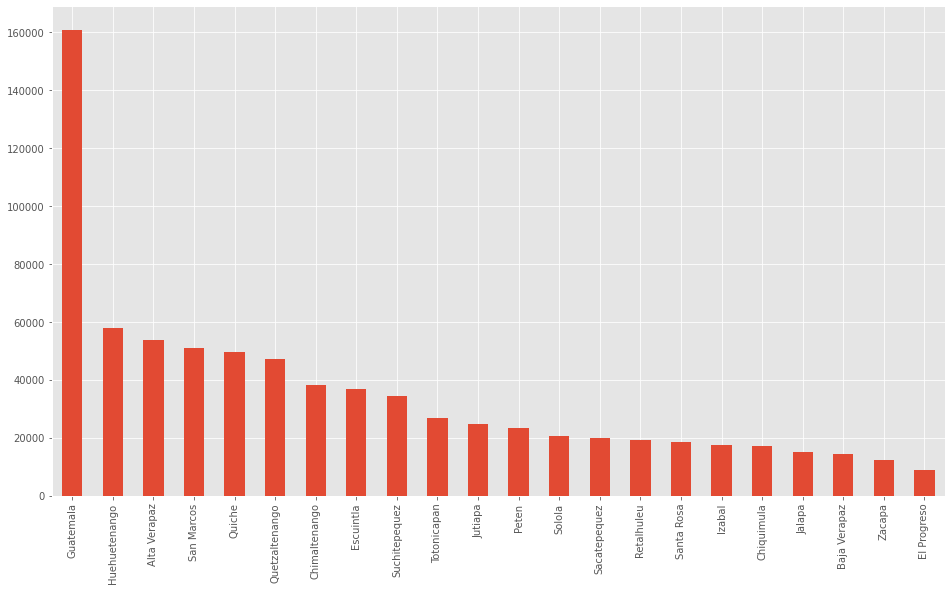

In [62]:
# cantidad de matrimonios segun el departamento

print(marriage_data['DEPREG'].value_counts().sort_values(ascending=False))
marriage_data['DEPREG'].value_counts().plot(kind='bar')

##### Aqui podemos observar que el departamento que tiene una diferencia bastante notable a comparacion de los demas departamentos es Guatemala con 160745 matrimonios.

2013    82513
2015    81501
2011    81187
2012    80804
2014    79928
2019    76146
2018    74952
2017    70827
2016    70385
2010    61519
2020     7341
Name: AÑOREG, dtype: int64


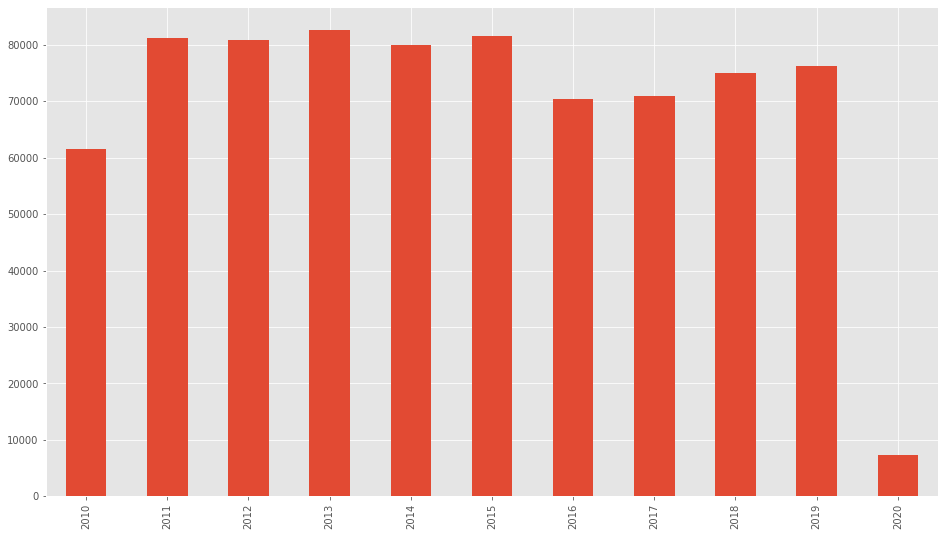

In [63]:
# cantidad de matrimonios por cada año

marriage_data['AÑOREG'].value_counts().sort_index().plot(kind='bar')

print(marriage_data['AÑOREG'].value_counts().sort_values(ascending=False))

12    77116
1     71566
5     68916
3     68479
11    65361
4     63603
2     62198
8     62107
10    59098
6     57418
7     56378
9     54863
Name: MESREG, dtype: int64


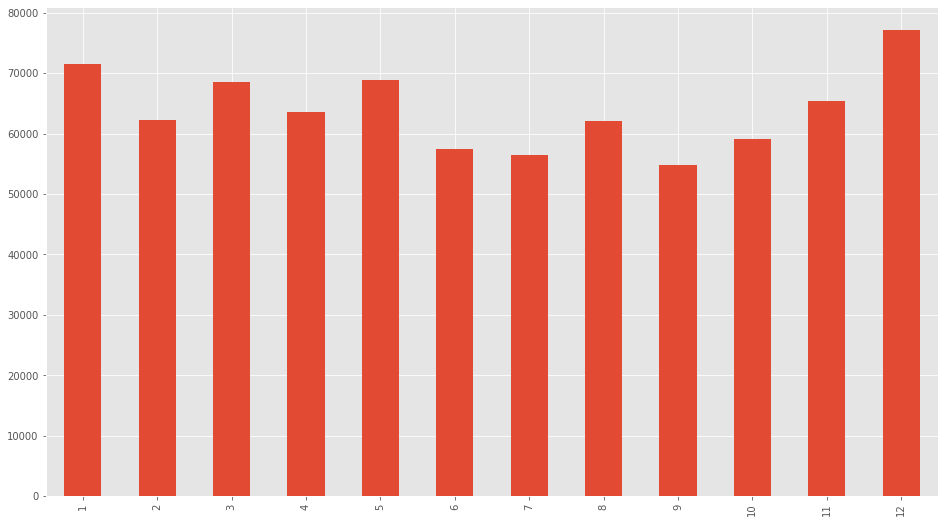

In [64]:
# Cantidad de matrimonios por cada mes

marriage_data['MESREG'].value_counts().sort_index().plot(kind='bar')

print(marriage_data['MESREG'].value_counts().sort_values(ascending=False))

##### Aqui podemos observar que los 3 años con mas matrimonios fueron 2013, 2015, 2011.

##### El mes que tuvo mas matrimonios desde 2010 hasta 2020 es el mes de diciembre

Asimetria: 1.9815599831262767
Curtosis: 4.398637240283122


<AxesSubplot:>

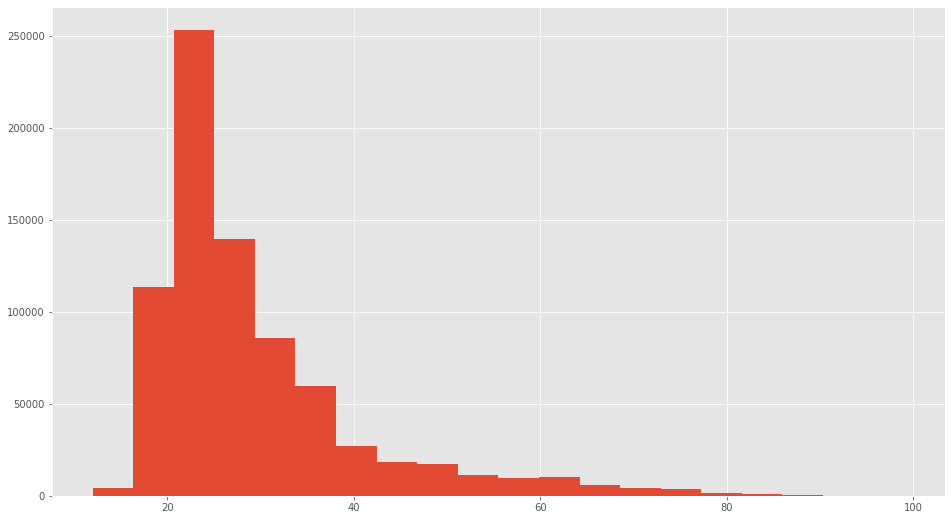

In [65]:
# histograma de edad de los hombres

print('Asimetria:', marriage_data['EDADHOM'].skew())
print('Curtosis:', marriage_data['EDADHOM'].kurt())
marriage_data['EDADHOM'].hist(bins=20)


<AxesSubplot:>

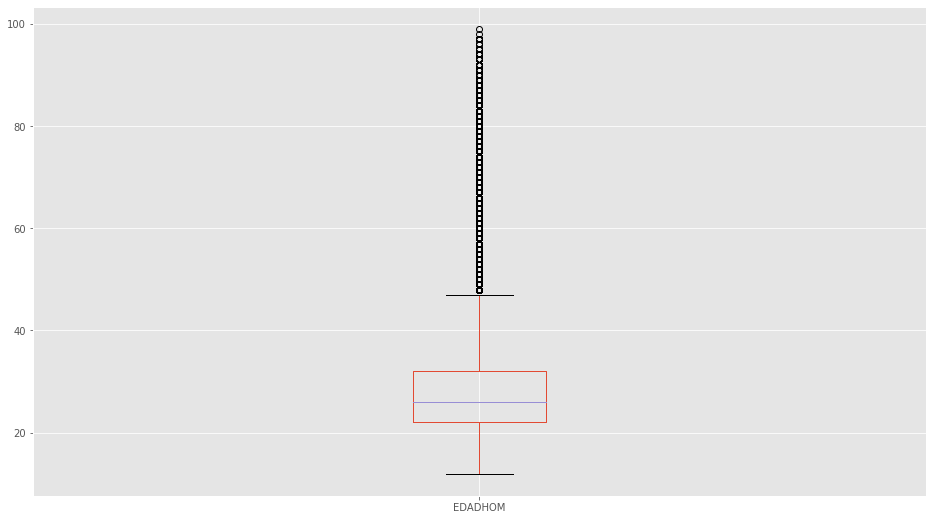

In [66]:

marriage_data.boxplot(column=['EDADHOM'])


Asimetria: 2.0268130479775475
Curtosis: 5.023822838493206


<AxesSubplot:>

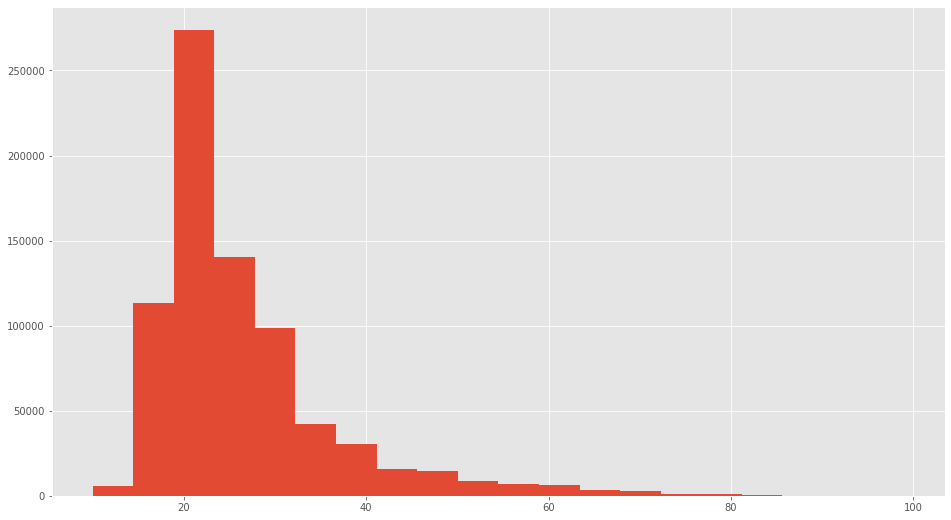

In [67]:
# Histograma de edad de las mujeres

print('Asimetria:', marriage_data['EDADMUJ'].skew())
print('Curtosis:', marriage_data['EDADMUJ'].kurt())
marriage_data['EDADMUJ'].hist(bins=20)

<AxesSubplot:>

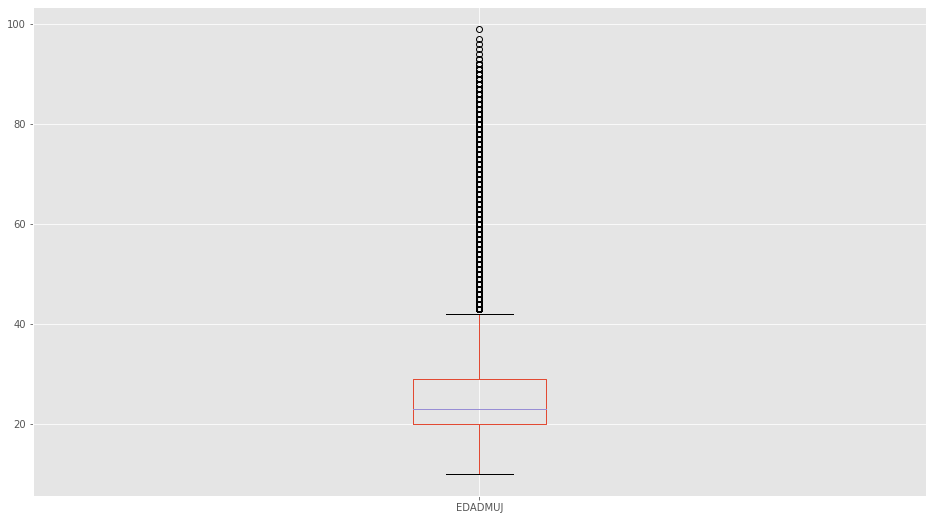

In [68]:
marriage_data.boxplot(column=['EDADMUJ'])

In [69]:
#Diaocu, mesocu, edad de hombre, edad de mujer, mesreg

dfNumData = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']].apply(pd.to_numeric)
dfNumData2 = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']].apply(pd.to_numeric).head(76710)
numData2 = np.array(dfNumData2)
numData = np.array(dfNumData)
numData




array([[ 7,  2, 28, 26,  2],
       [18, 12, 28, 20, 12],
       [10,  3, 25, 22, 12],
       ...,
       [15, 12, 30, 29,  1],
       [ 7, 12, 44, 39, 12],
       [23, 10, 34, 35, 11]])

<AxesSubplot:ylabel='Density'>

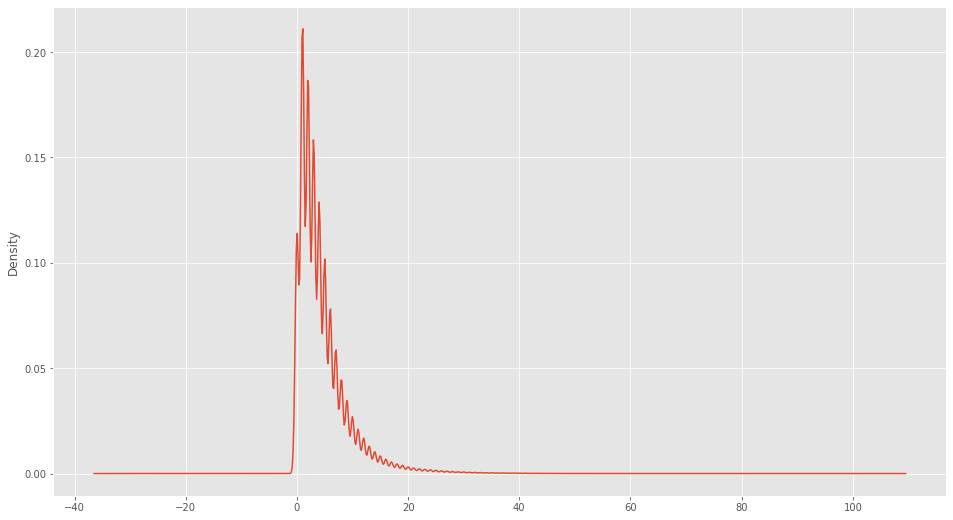

In [70]:
marriage_data['EDADDIF'] = marriage_data['EDADHOM'].sub(marriage_data['EDADMUJ']).abs()
marriage_data['EDADDIF'].plot(kind='density')


<AxesSubplot:>

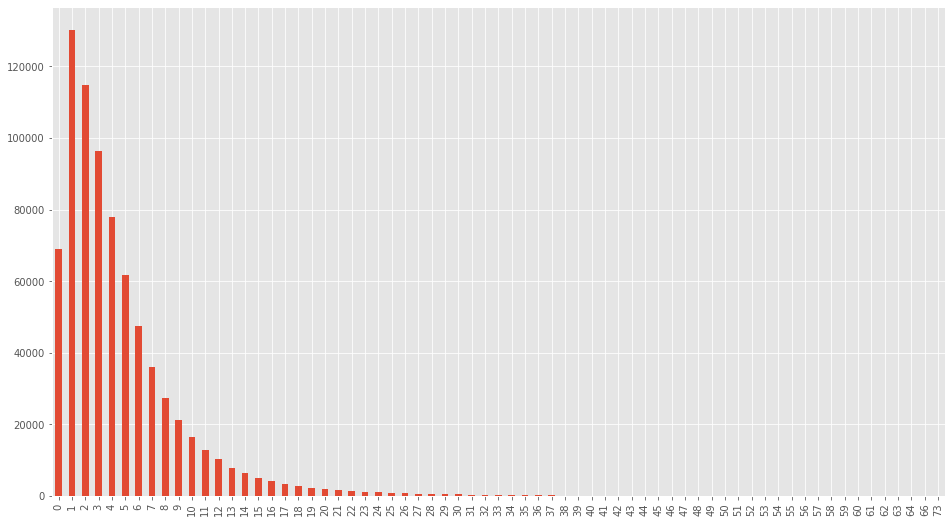

In [71]:
marriage_data['EDADDIF'].value_counts().sort_index().plot(kind='bar')

Asimetria: 2.721785708391625
Curtosis: 12.18902718683168


<AxesSubplot:>

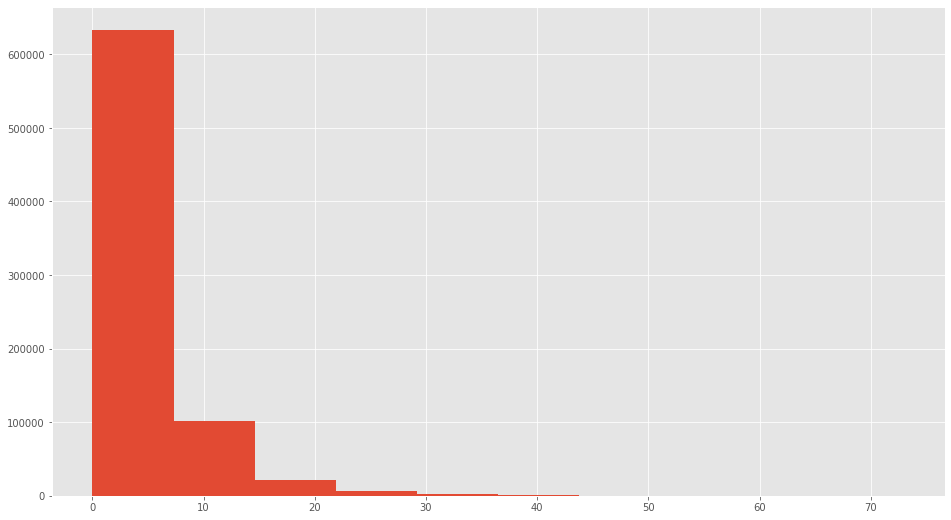

In [74]:

print('Asimetria:', marriage_data['EDADDIF'].skew())
print('Curtosis:', marriage_data['EDADDIF'].kurt())
marriage_data['EDADDIF'].hist()

##### Podemos observar en estas representaciones graficas de la diferencia de edad entre hombre y mujeres que estas se encuentran entre 0 años de diferencia hasta 20 años.

### Correlacion utilizando Spearman

<AxesSubplot:>

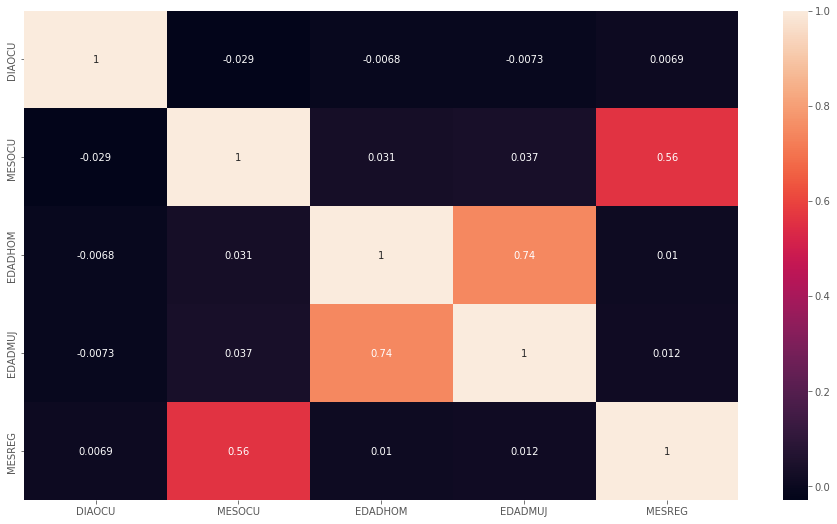

In [24]:
sb.heatmap(dfNumData.corr(method='spearman'), xticklabels=dfNumData.corr().columns, yticklabels=dfNumData.corr().columns, annot=True)

### Correlacion utilizando Pearson

<AxesSubplot:>

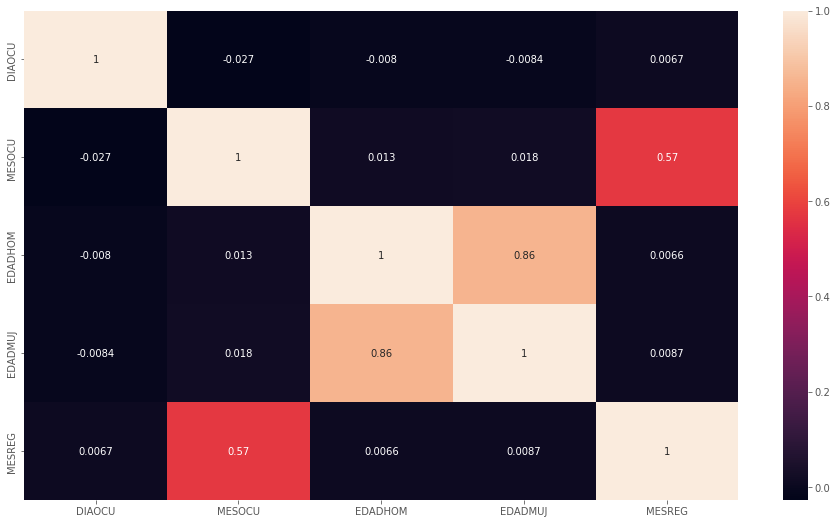

In [25]:
sb.heatmap(dfNumData.corr(), xticklabels=dfNumData.corr().columns, yticklabels=dfNumData.corr().columns, annot=True)

#### Utilizando las variables cuantitativas de mayor relevancia y que tengan algun sentido entre si, nos dio como resultado los heatmap de correlacion que se encuentran arriba. 

In [26]:
numData_scaled = sklearn.preprocessing.scale(numData)
pyclustertend.hopkins(numData, len(numData))

0.06946391232698441

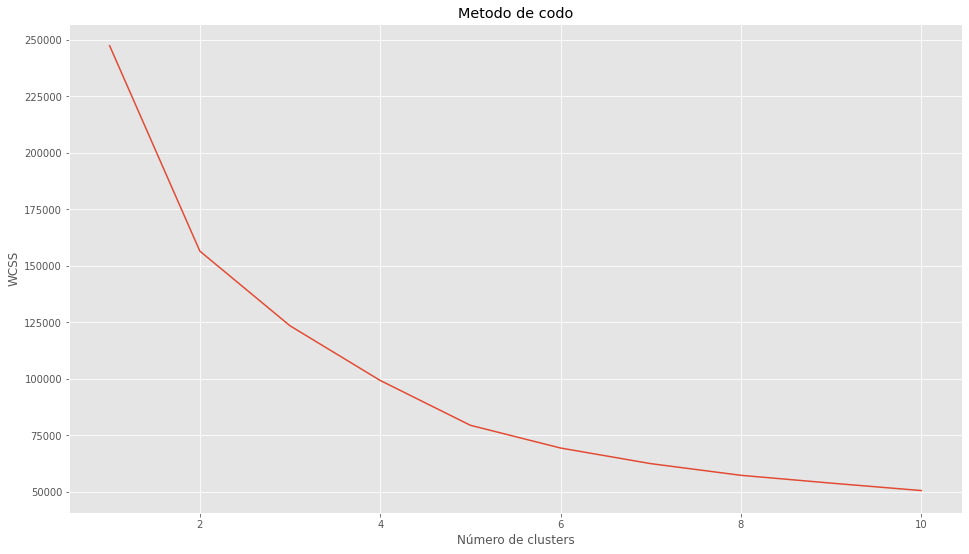

In [27]:
variables = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']]

# normalizar datos
variables_norm = (variables - variables.min()) / (variables.max() - variables.min())
variables_norm

#busqueda de la cantidad optima de clusters con el metodo de codo
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(variables_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo de codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


#### Con el gráfico del método del codo, podemos decir que el punto de deflexión adecuado para decidir cobre el número de clusters es el 2, debido al cambio de pendiente mayot antes de la tendencia a la estabilización de la tangente sobre la gráfica.

In [28]:
# Creando muestra aleatoria del 10% de los datos
dfNumData = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']].apply(pd.to_numeric)
dfNumData = dfNumData.sample(frac=0.1).reset_index(drop=True)
numData = np.array(dfNumData)

Para:  2 Clusters  La cantidad promedio de la silueta es : 0.5304795739875294
Para:  3 Clusters  La cantidad promedio de la silueta es : 0.3070473419813024
Para:  4 Clusters  La cantidad promedio de la silueta es : 0.30873940536523076
Para:  5 Clusters  La cantidad promedio de la silueta es : 0.27453367407342955
Para:  6 Clusters  La cantidad promedio de la silueta es : 0.2548731839200873


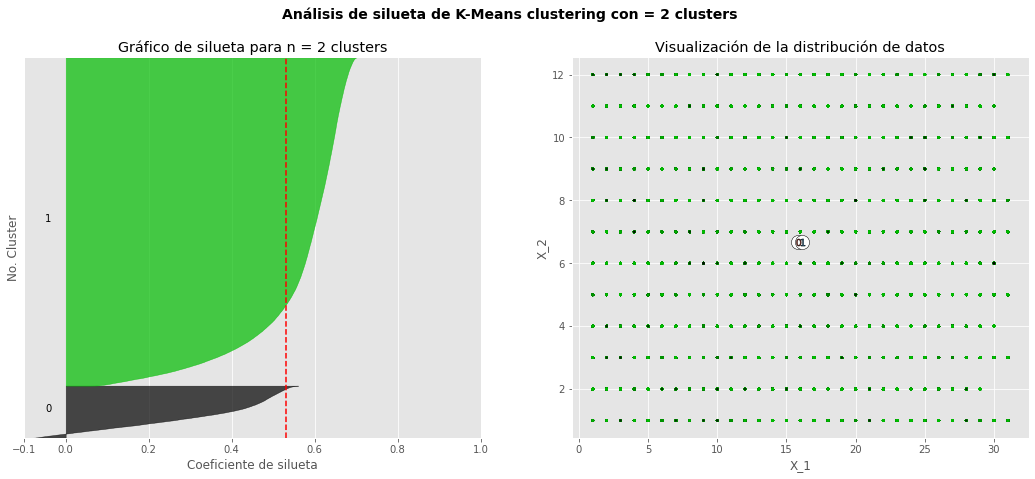

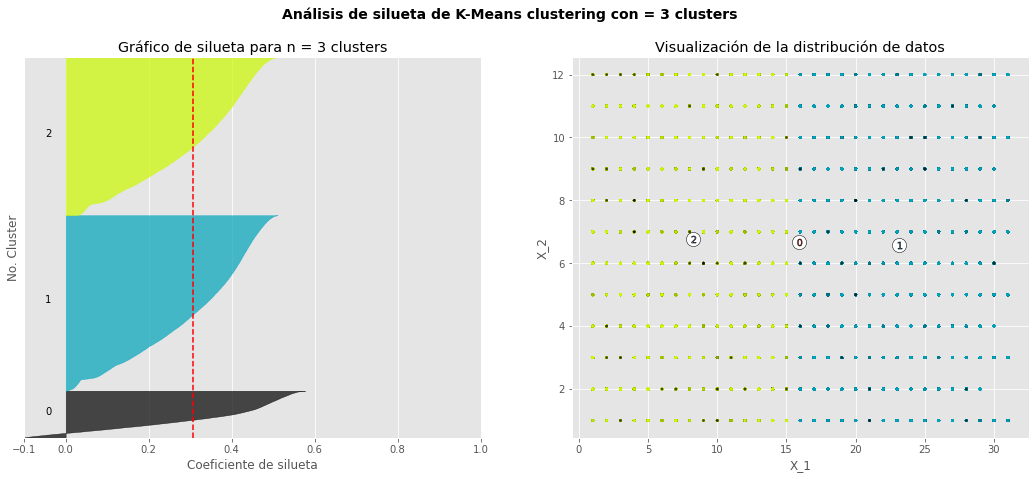

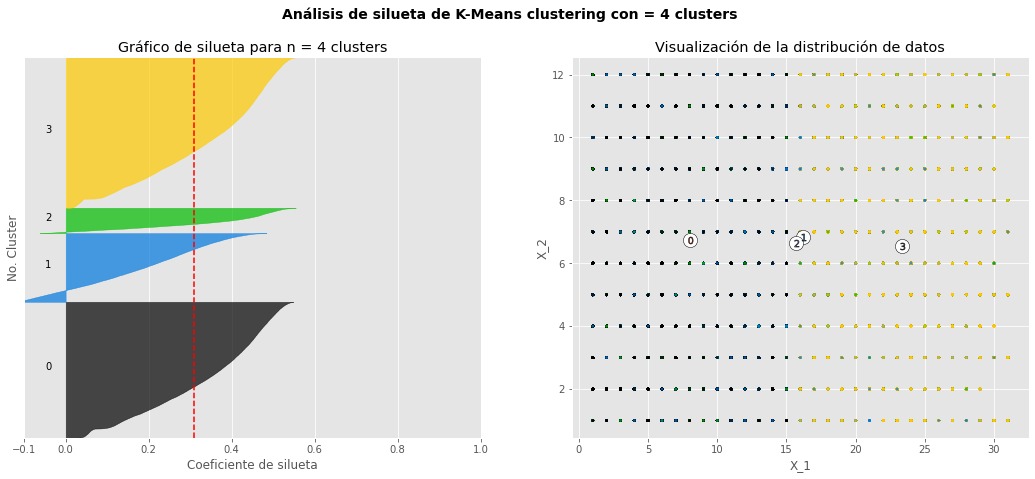

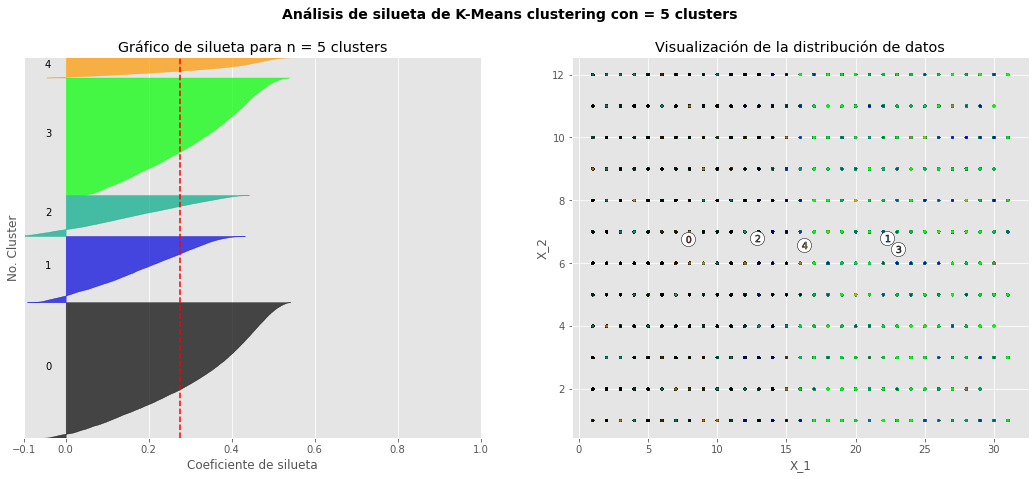

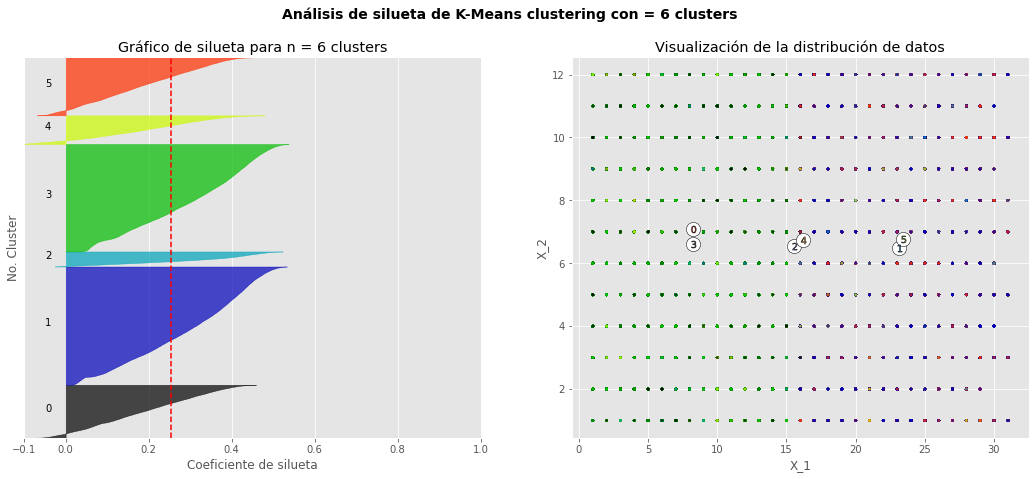

In [29]:
# Basado en el ejemplo de calculo de silueta visto en clase

range_n_clusters = [2, 3, 4, 5, 6]

# Loop sobre los distintos valores de n_clusters
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(numData) + (n_clusters + 1) * 10])

    # El (n_clusters+1)*10 es para el espacio en blanco entre las siluetas
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(numData)

    # El silhouette_score calcula la calidad de agrupamiento promedio de la silueta
    silhouette_avg = silhouette_score(numData, cluster_labels)
    print(
        "Para: ",
        n_clusters,
        "Clusters  La cantidad promedio de la silueta es :",
        silhouette_avg,
    )

    # El silhouette_samples calcula la calidad de agrupamiento de cada punto
    sample_silhouette_values = silhouette_samples(numData, cluster_labels)

    y_lower = 10

    # Loop sobre los grupos
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        # El primer valor es el más bajo
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Color de la silueta
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Dibuja la silueta
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Dibuja el nombre del grupo
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10

    ax1.set_title("Gráfico de silueta para n = {} clusters".format(n_clusters))
    ax1.set_xlabel("Coeficiente de silueta")
    ax1.set_ylabel("No. Cluster")


    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) 

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        numData[:, 0], numData[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Dibuja el centroide de cada grupo
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):

        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")



    ax2.set_title("Visualización de la distribución de datos")
    ax2.set_xlabel("X_1")
    ax2.set_ylabel("X_2")

    plt.suptitle(
        "Análisis de silueta de K-Means clustering con = %d clusters"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Como podemos observar, se obtiene un buen resultado promedio de coeficiente de silueta para 2 clusters de 0.53. Además, por lo observado en la gráfica de codo, podemos decir que es adecuado realizar el agrupamiento con 2 clusters.

### Probando 3 algoritmos para el agrupamiento

#### K-means

In [30]:
variables = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']]
variables = variables.sample(frac=0.1).reset_index(drop=True)
# normalizar datos
variables_norm = (variables - variables.min()) / (variables.max() - variables.min())
variables_norm

,DIAOCU,MESOCU,EDADHOM,EDADMUJ,MESREG
0,0.200000,1.000000,0.146341,0.147727,0.000000
1,0.033333,0.727273,0.158537,0.125000,0.727273
2,0.500000,1.000000,0.134146,0.079545,0.000000
3,0.033333,0.363636,0.280488,0.102273,0.363636
4,1.000000,0.181818,0.585366,0.477273,0.272727
...,...,...,...,...,...
76705,0.400000,0.545455,0.097561,0.079545,0.545455
76706,0.833333,1.000000,0.085366,0.090909,0.000000
76707,0.233333,0.909091,0.158537,0.147727,0.909091
76708,0.433333,0.545455,0.170732,0.136364,0.545455


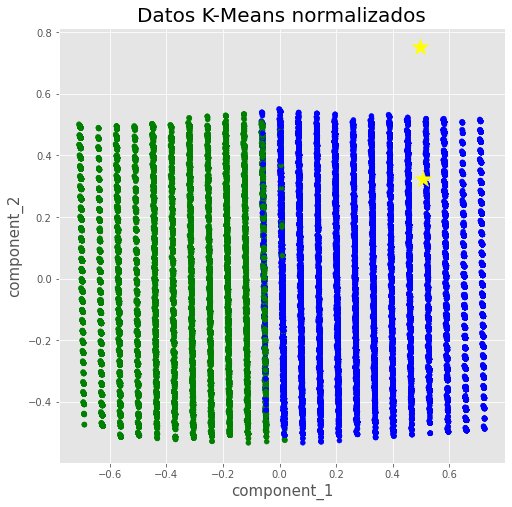

In [31]:
# Aplicando el metodo de k-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(variables_norm)


#normalize the centroids
centroids = kmeans.cluster_centers_
centroids_norm = (centroids - centroids.min()) / (centroids.max() - centroids.min())
centroids_norm



pca = PCA(n_components=2)
pca_data = pca.fit_transform(variables_norm)
pca_data_df = pd.DataFrame(data=pca_data, columns=['component_1', 'component_2'])

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('component_1', fontsize=15)
ax.set_ylabel('component_2', fontsize=15)
ax.set_title('Datos K-Means normalizados', fontsize=20)

color_theme = np.array(['blue', 'green', 'orange'])
ax.scatter(pca_data_df['component_1'], pca_data_df['component_2'], c=color_theme[kmeans.labels_], s=25)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow", marker="*")
plt.show()